In [121]:
!pip install scikit-learn

## Loading Data

In [149]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('vehicles.csv')
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,NaN,bicycle
1,8,male,NaN,scooter
2,10,female,NaN,bicycle
3,14,male,NaN,metro
4,16,male,NaN,metro
5,18,female,NaN,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


In [124]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Favorite Transport     object
dtype: object

## Cleaning

In [125]:
df.isnull().sum()

Age                   0
Gender                0
Income                6
Favorite Transport    0
dtype: int64

In [126]:
df.fillna({'Income':0.0}, inplace=True)
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,0.0,bicycle
1,8,male,0.0,scooter
2,10,female,0.0,bicycle
3,14,male,0.0,metro
4,16,male,0.0,metro
5,18,female,0.0,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


In [127]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Favorite Transport    0
dtype: int64

## Encoding

In [128]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [129]:
# OPTION 1
# df.replace({
#     'Gender': {
#         'male': 0,
#         'female': 1
#     }
# }, inplace=True)
# df.head()

In [130]:
#OPTION 2
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,0,0.0,bicycle
1,8,1,0.0,scooter
2,10,0,0.0,bicycle
3,14,1,0.0,metro
4,16,1,0.0,metro
5,18,0,0.0,metro
6,20,1,200.0,scooter
7,22,0,500.0,scooter


In [131]:
df.dtypes

Age                     int64
Gender                  int64
Income                float64
Favorite Transport     object
dtype: object

## Model

In [132]:
X = df.drop(columns=['Favorite Transport'])
X.head(5)

,Age,Gender,Income
0,5,0,0.0
1,8,1,0.0
2,10,0,0.0
3,14,1,0.0
4,16,1,0.0


In [133]:
y = df['Favorite Transport']
y.head(5)

0    bicycle
1    scooter
2    bicycle
3      metro
4      metro
Name: Favorite Transport, dtype: object

In [134]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [135]:
model.fit(X, y)

DecisionTreeClassifier()

## Prediction

In [136]:
test_df = pd.DataFrame({
    'Age': [12, 30, 75],
    'Gender': [0, 0, 1],
    'Income': [0.0, 4000, 50000]
})
test_df

,Age,Gender,Income
0,12,0,0.0
1,30,0,4000.0
2,75,1,50000.0


In [137]:
model.predict(test_df)

array(['bicycle', 'car', 'helicopter'], dtype=object)

## Evaluation

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape

(26, 3)

In [139]:
X_train.shape

(20, 3)

In [140]:
X_test.shape

(6, 3)

In [141]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [142]:
predictions = model.predict(X_test)
predictions

array(['taxi', 'car', 'car', 'car', 'metro', 'car'], dtype=object)

In [143]:
X_test

,Age,Gender,Income
17,53,0,1300.0
12,33,1,7000.0
16,49,1,8000.0
21,64,1,6500.0
4,16,1,0.0
22,68,1,20000.0


In [144]:
model_accuracy_score = accuracy_score(y_test, predictions)
model_accuracy_score

0.8333333333333334

## Exporting to the DOT file

In [148]:
tree.export_graphviz(model, out_file='decision_tree_model.dot', feature_names=['Age', 'Gender', 'Income'], filled=True, class_names=sorted(y.unique()))

## Charts

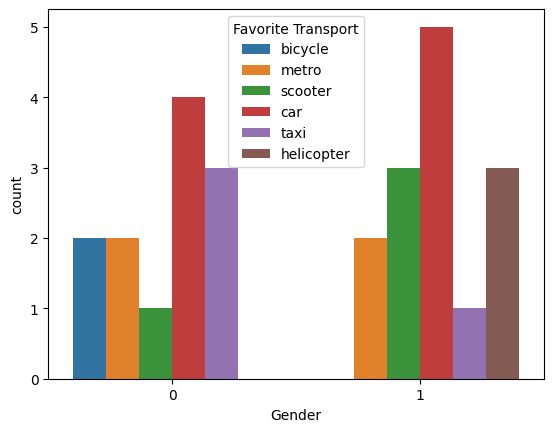

In [150]:
sns.countplot(x=df['Gender'], hue=df['Favorite Transport'])
plt.show()

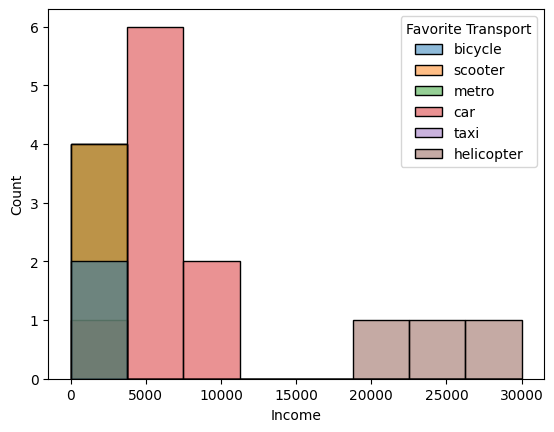

In [152]:
sns.histplot(x=df['Income'], hue=df['Favorite Transport'])
plt.show()